https://unimibfisicalaboratori.github.io/UnimibFisicaLabStatPythonWebBook/lectures/Lecture_10/EXERCISES.html

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import expon
from IPython.display import Latex

Basic functions:

In [5]:
def exp(tau):
    if tau != 0:
        return -tau*np.log(1-np.random.uniform())

In [6]:
def pdf(N,t0):
    return np.array([exp(t0) for i in range(N)])

In [7]:
def max(sample):    #Max of data
    m=sample[0]
    for i in sample:
        if i > m: m = i
    return m

def min(sample):
    m=sample[0]
    for i in sample:
        if i < m: m = i
    return m

<h1>Data</h1>
Generating Exponentially distributed Data

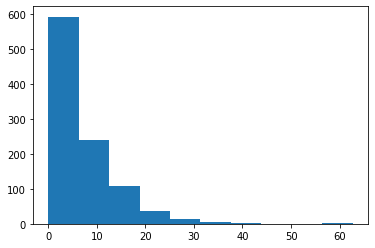

In [8]:
N = 1000
t0 = 7      #caratteristic time


dati = pdf(N,t0)


plt.hist(dati,bins=10)
plt.show()

<h1>Likelihood and LogLikelihood

Likelihood

In [9]:
def likelihood(dati,t):
    return np.prod([(np.exp(-i/t)/t) for i in dati])

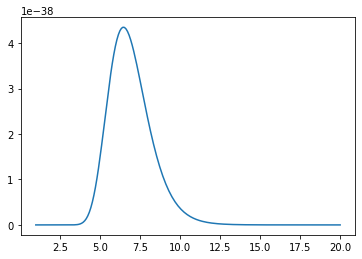

In [10]:
t_range = np.linspace(1,20,200) #range of t0 values


like = [likelihood(dati[:30],t) for t in t_range]


plt.plot(t_range,like)
plt.show()

Loglikelihood

In [11]:
def loglikelihood_Originale(dati,t):
    return np.sum([np.log(np.exp(-i/t)/t) for i in dati])

In [12]:
def loglikelihood(dati,t):
    return np.sum([(-i/t)-np.log(t) for i in dati])

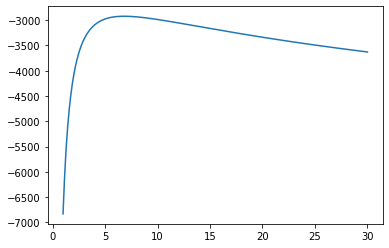

In [13]:
t_range = np.linspace(1,30,200) #range of t0 values
logLike = [loglikelihood(dati,t) for t in t_range]

plt.plot(t_range,logLike)
plt.show()

Comparing likelihoods with different data sizes

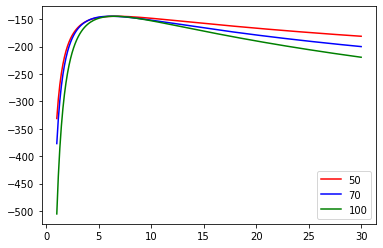

In [14]:
like1 = [loglikelihood(dati[:50],t) for t in t_range]
like2 = [loglikelihood(dati[:70],t) for t in t_range]
like3 = [loglikelihood(dati[:100],t) for t in t_range]

m1 = max(like1)
m2 = m1-max(like2)
m3 = m1-max(like3)

like2 = [i+m2 for i in like2]
like3 = [i+m3 for i in like3]

plt.plot(t_range,like1,c='red',label=50)
plt.plot(t_range,like2,c='blue',label=70)
plt.plot(t_range,like3,c='green',label=100)
plt.legend()
plt.show()

<h1>Finding Maximum

In [15]:
def max_sez_aurea(sample,func,t,prec=.001):

    r = (-1+sqrt(5))/2  #golden ratio

    xmin = min(t)
    xmax = max(t)

    while abs(xmax-xmin) > prec:

        a = xmin +     r* abs(xmax-xmin)
        b = xmin + (1-r)* abs(xmax-xmin)
        
        if func(sample,b) < func(sample,a):
            xmin = b
        else: 
            xmax = a

    return xmin,func(sample,xmin)

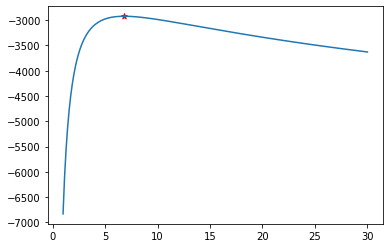

<IPython.core.display.Latex object>

In [16]:
l = [loglikelihood(dati,i) for i in t_range]

x_max,y_max = max_sez_aurea(dati,loglikelihood,t_range)

plt.plot(t_range,l)
plt.scatter(x_max,y_max,marker='*',c='red')
plt.show()
Latex(f"$$\\hat \\theta = {x_max}$$")

**Comparing sum and product difference log likelihood**

In [17]:
t_range = np.linspace(1,10,200) #range of t0 values

In [18]:
def loglikelihoodProd(dati,t,n=30):
    a = likelihood(dati[:n],t)
    if a != 0:
        return np.log(a)

In [19]:
sum = [loglikelihood(dati,i) for i in t_range]

In [20]:
prod = [loglikelihoodProd(dati,j,250) for j in t_range]

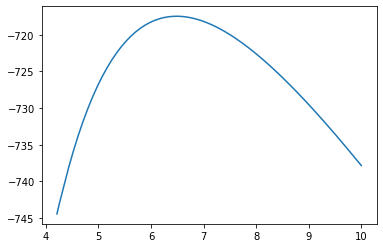

In [21]:
plt.plot(t_range,prod)
# plt.plot(t_range,sum)
plt.show()

**Finding Zeros**

In [22]:
def zeros(func,dati,xmin,xmax,prec=.001):
    
    x_max,yMax = max_sez_aurea(dati,func,t_range)
    
    a = xmin
    b = xmax

    mean = ((b-a)/2)+a

    while(abs(b-a) > prec):

        mean = ((b-a)/2)+a

        fa = (func(dati,a)-yMax+0.5)
        fb = (func(dati,mean)-yMax+0.5)

        if  fa*fb > 0:
            a = mean
        else:
            b = mean
        
    return mean

In [23]:
a,b = 1,10

t_range = np.linspace(a,b,1000) #range of t0 values

x_max,y_max = max_sez_aurea(dati,loglikelihood,t_range)

l = [loglikelihood(dati,t)-y_max+0.5 for t in t_range]

z = zero1 , zero2 = zeros(loglikelihood,dati,a,x_max) , zeros(loglikelihood,dati,x_max,b)
sigma = zero2-x_max


In [24]:
Latex(f"$$\\hat \\theta = {x_max} \\newline \\hat \\theta - \\sigma_\\theta = {zero1} \\newline \\hat \\theta + \\sigma_\\theta = {zero2} \\newline \\sigma = {sigma}$$")

<IPython.core.display.Latex object>

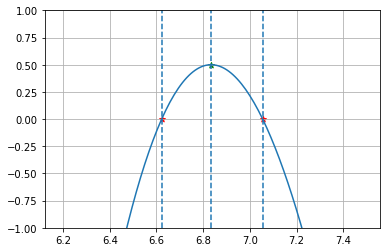

In [26]:
#plot the curve
plt.plot(t_range,l)
plt.scatter(z,(0,0),marker = '*',c='red')

#plot dots
plt.scatter(x_max,.5,marker = '*',c='green')

plt.vlines(x=[x_max,zero1,zero2],ymin=-1,ymax=1,linestyles='--')

plt.ylim(-1,1)
plt.xlim(zero1-.5,zero2+.5)
plt.grid(True)

In [27]:
Latex(f"$$\\hat \\theta = {x_max} \\newline t_0 = {t0}$$")

<IPython.core.display.Latex object>

**Normal distribution of estimated value**

In [28]:
def normal(mean,sigma,N,n=100):
    '''toy normal distribution'''
    delta = np.sqrt(3*n)*sigma
    a = np.empty(N)

    for i in range(N):

        a[i] = np.average([ np.random.uniform(mean-delta , mean+delta) for j in range(n) ])
    
    return a

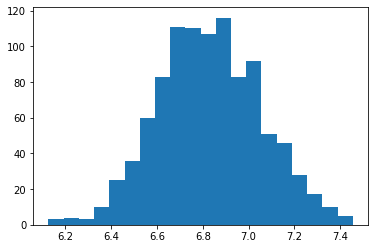

In [29]:
normal_estimated = normal(x_max,sigma,1000)
plt.hist(normal_estimated,bins=20)
plt.show()

In [30]:
Latex(f"$$Estimated :\\sigma_\\theta = {{{sigma}}} \\newline  Data : \\sigma_d = {{{np.std(dati)}}}$$")

<IPython.core.display.Latex object>

<h1>Asymptotic property

In [31]:
t_range = np.linspace(1,10,200) #range of t0 values



In [46]:
# plt.scatter(t_range,estim)